# Mass Mobilization Project
<img style="float: right;" src="../images/man_with_hammer.png">

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score,
                            roc_auc_score,
                            plot_roc_curve)

import pickle 

### Reading in data 

In [2]:
print(sklearn.__version__)

0.24.1


In [4]:
mass = pd.read_csv('../data/mass_mobile.csv')
mass.head(2)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1


### Creating `mass_no_country` DataFrame

In [5]:
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
mass_no_country = mass.copy()

In [7]:
mass_no_country = mass_no_country.drop(columns=[ 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe' ])

### Adding `violent_response` column 

__`violent_response` indicates whether any of the three violent state responses -- beatings, shootings, or killings -- took place for a given protest. 1 if **any** of these occurred; 0 if **none** of them occurred.__ 

In [8]:
mass_no_country['violent_response'] = 0 
mass_no_country.loc[mass_no_country['beatings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass_no_country['shootings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass_no_country['killings'] == 1, 'violent_response'] = 1

In [9]:
mass_no_country['violent_count'] = mass_no_country['beatings'] + mass_no_country['shootings'] + mass_no_country['killings']

In [10]:
# mass_no_country.drop(columns=['beatings', 'killings', 'shootings'], inplace=True)

In [11]:
mass_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     15179 non-null  int64  
 1   country                                15179 non-null  object 
 2   ccode                                  15179 non-null  int64  
 3   region                                 15179 non-null  object 
 4   protestnumber                          15179 non-null  int64  
 5   protesterviolence                      15179 non-null  float64
 6   location                               15158 non-null  object 
 7   protesteridentity                      15179 non-null  object 
 8   sources                                15175 non-null  object 
 9   notes                                  15179 non-null  object 
 10  protester_id_type                      15179 non-null  object 
 11  pa

### Saving CSV 

Below, saving again `mass_no_country` as `mass_for_modeling` with the following columns: 
+ `violent_response` added 
+ all countries dropped 
+ NO prediction columns 

In [12]:
# mass_no_country.to_csv('../data/mass_for_modeling.csv')

In [43]:
def evaluate_model(y_true, y_preds):
    
    '''
    Takes in any pair of y_true and y_preds and returns metrics. 
    This function is called in the state_response_predictor function to calculate metrics for both train and test sets. 
    '''
    
    f1 = f1_score(y_true, y_preds)
    
    precision = precision_score(y_true, y_preds)
    
    recall = recall_score(y_true, y_preds)
    
    accuracy = accuracy_score(y_true, y_preds)

    return f1, precision, recall, accuracy

_Note: I am not yet using the `response_prediction_columns` function and have commented it out from `state_response_predictor` function._

In [44]:
def response_prediction_columns(model, df, features):
    
    '''
    Takes in a model whose target is one given state response. The model has already been fit and evaluated on training and test sets.
    Also takes in a DataFrame and selected features. 
    Scales the features and gets a prediction and a probability for whether that response will occur for every row in the DataFrame. 
    Returns two new columns (binary prediction and probability) and appends those to the DataFrame. 
    '''
    
    ss = StandardScaler()
    
    X = features
    X_sc = ss.fit_transform(X)
    
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [45]:
def state_response_predictor(df, features, target, model, output_flag=False):
    
    '''
    Takes in Dataframe, selection of features, target, ad instantiated model.
    Scales train and test features. 
    Fits model on train data.
    Makes predictions on scaled train and test sets. 
    Finds following metrics for both train and test sets: f1 score, precision, recall, accuracy, roc/auc
    Returns the metrics to use to evaluate the model and build the model_performance_df. 
    Returns X_train to be used to find feature importances. 
    Note: the instantiated model passed to this function is then a fit model once the function has been run. 
    '''
    
    X = features 
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()

    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    model.fit(X_train_sc, y_train)
    
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    predicted_probs = model.predict_proba(X_test_sc)

    f1_score_train, precision_train, recall_train, accuracy_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test, accuracy_test = evaluate_model(y_test, y_preds_test)
    
    roc_auc = roc_auc_score(y_test, predicted_probs[:,1])
    
#     predicted_column, probability_column = response_prediction_columns(model, df, features)

    if output_flag: 

        # confusion_matrix 
        plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])

        # ROC/AUC 
        plot_roc_curve(model, X_test_sc, y_test, name=target)
#         plt.title(f'{target} ' + 'ROC Curve')

    #     print(f'{target}: F1_score for train set = {f1_score_train}')
    #     print(f'{target}: F1_score for test set = {f1_score_test}')
    #     print(f'{target}: Precision for train set = {precision_train}')
    #     print(f'{target}: Precision for test set = {precision_test}')
    #     print(f'{target}: Recall for train set = {recall_train}')
    #     print(f'{target}: Recall for test set = {recall_test}')
    #     print(f'{target}: Accuracy for train set = {accuracy_train}')
    #     print(f'{target}: Accuracy for test set = {accuracy_test}')    
    #     print(f'{target}: ROC/AUC = {roc_auc}')

    return (X_train, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, 
            recall_train, recall_test, accuracy_train, accuracy_test)

In [46]:
def find_most_important_features(X_train, model, n=5):
    
    '''
    Takes in X_train which is a list of features as well as a model that has been fit. 
    Builds list of features and their associated coefficients that correlate the most strongly with the target on which the model is built.
    The features can correlate either negatively (predicting that the response will not occur) or positively (predicting that the response will occur).
    '''

    feature_importances = list(zip(X_train.columns, model.coef_[0]))

    sorted_coeff = sorted(feature_importances, key = lambda x : x[1])

    strongest_negative = sorted(sorted_coeff[:n], key = lambda x : x[1])

    strongest_positive = sorted_coeff[-n:]
    
    negative_features = [x[0] for x in strongest_negative[-n::]]
    negative_coeffs = [x[1] for x in strongest_negative[-n::]]
    positive_features = [x[0] for x in strongest_positive[-n::]]
    positive_coeffs = [x[1] for x in strongest_positive[-n::]]

    return negative_features, negative_coeffs, positive_features, positive_coeffs

In [17]:
# Building a dictionary 
# keys = each of the columns in the dataframe 
# values = more informative, more readable label that will be better for visualizations 


feat_dict = {'protestnumber':'No. Protests that Year',
             'protesterviolence': 'Protesters Violent', 
             'pop_total': 'Population of Country',
             'pop_density': 'Population Density of Country',
             'prosperity_2020': 'Prosperity Index of Country', 
             'region_Africa': 'Region: Africa',
             'region_Asia': 'Region: Asia',
             'region_Central America': 'Region: Central America', 
             'region_Europe': 'Region: Europe', 
             'region_MENA': 'Region: Middle East/North Africa',
             'region_North America': 'Region: North America', 
             'region_Oceania': 'Region: Oceania',
             'region_South America': 'Region: South America',
             'protest_size_category_1,000-4,999': 'No. Participants: 1,000 - 4,999',
             'protest_size_category_10,000-100,000':'No. Participants: 10,000 - 100,000',
             'protest_size_category_100-999': 'No. Participants: 100 - 999',
             'protest_size_category_5,000-9,999': 'No. Participants: 5,000 - 9,999', 
             'protest_size_category_50-99': 'No. Participants: 50 - 99',
             'protest_size_category_Less than 50': 'No. Participants <50',
             'protest_size_category_Over 100,000': 'No. Participants >100,000',
             'protester_id_type_civil_human_rights': 'Participants: Civil/Human Rights Groups',  
             'protester_id_type_ethnic_group': 'Participants: Ethnic Group', 
             'protester_id_type_locals_residents': 'Participants: Local Residents',
             'protester_id_type_pensioners_retirees': 'Participants: Pensioners & Retirees',
             'protester_id_type_political_group': 'Participants: Political Group', 
             'protester_id_type_prisoners': 'Participants: Prisoners',
             'protester_id_type_protestors_generic': 'Participants: Generic',
             'protester_id_type_religious_group': 'Partcipants: Religious Group',       
             'protester_id_type_soldiers_veterans': 'Participants: Soldiers/Veterans',
             'protester_id_type_students_youth': 'Participants: Students/Youth ',
             'protester_id_type_victims_families': 'Participants Families of Victims', 
             'protester_id_type_women': 'Participants: Women',
             'protester_id_type_workers_unions': 'Participants: Workers & Union Members', 
             'labor_wage_dispute': 'Protest Premise: Labor & Wage Disputes',
             'land_farm_issue': 'Protest Premise: Land or Farming', 
             'police_brutality': 'Protest Premise: Police Brutality', 
             'political_behavior_process': 'Protest Premise: Political Behavior & Process',
             'price increases_tax_policy': 'Protest Premise: Tax Increases / Tax Policy', 
             'removal_of_politician': 'Protest Premise: Removal of Politician',
             'social_restrictions': 'Protest Premise: Social Restrictions'}

In [18]:
font_title = {'family': 'roboto',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 23,
        }

font_dict = {'family': 'roboto',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 13,
        }

def plot_most_important_features(negative_features, negative_coeffs, positive_features, positive_coeffs, target):
    
    '''
    Takes in features and coefficients from find_most_important_features function and produces a plot.
    '''
        
    # setting up range of axes    
    y_pos = np.arange(len(negative_coeffs))
    x_pos = 1
    
    # building sorted list of coefficients that match the features they represent 
    pairs_pos = [(a,b) for a,b in zip(positive_coeffs, positive_features)]
    pairs_pos = sorted(pairs_pos, key=lambda x: x[0])
    
    pairs_neg = [(a,b) for a,b in zip(negative_coeffs, negative_features)]
    pairs_neg = sorted(pairs_neg, key=lambda x: x[0], reverse=True)
    
    positive_coeffs = [a[0] for a in pairs_pos]
    positive_features = [a[1] for a in pairs_pos]
    
    negative_coeffs = [a[0] for a in pairs_neg]
    negative_features = [a[1] for a in pairs_neg]
    
    # setting the range of the x-axis ticks by taking length of the largest/smallest coefficients and placing one intermediate tick
    # Note: creates axes that are not scaled to each other (i.e. bars are proportional to others in the same subplot but not to the other subplot)
    # In other words, negative and positive x_axes are not on same scale, though I did try very hard to fix this. 
    x_ticks_pos = np.linspace(0, round(max(positive_coeffs), 1), 3)
    x_ticks_neg = np.linspace(round(min(negative_coeffs), 1), 0, 3)
    
    # instantiating plot 
    fig = plt.figure(figsize=(10,4))
    
    # calling feat_dict so that plots have nice human interpretable value from feat_dict instead of column name 
    negs = [feat_dict.get(f, None) for f in negative_features]
    poss = [feat_dict.get(f, None) for f in positive_features]
    
    # negative subplot represents features that correlate most strongly with the given target not occurring 
    ax = plt.subplot(121)
    plt.barh(y_pos, negative_coeffs, align='center', alpha=0.7, color='#697D90')
    plt.title('Less Likely', fontdict=font_dict)
    plt.xticks(x_ticks_neg,rotation = '25')
    plt.yticks(y_pos, negs, fontsize=10)
     
    # positive subplot represents features that correlate most strongly with the target occurring 
    ax2 = plt.subplot(122)
    plt.barh(y_pos, positive_coeffs, align='center', alpha=0.7, color="#C9403B")
    plt.title(('More Likely'), fontdict=font_dict)
    plt.xticks(x_ticks_pos,rotation = '25')   
    plt.yticks(y_pos, poss, fontsize=10)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()

    # put nice spacing between subplots
    # thank you Prasoon for this solution! 
    plt.tight_layout()
    
    # putting title over both subplots and aligning it vertically 
    fig.subplots_adjust(top=.82)
    fig.suptitle(target, fontdict=font_title) 

### Identifying `features` to use in Logistic Regressions

In [19]:
features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 
           'partipants_number','pop_male', 'pop_female', 'violent_response', 'violent_count', 'protest_duration'])

##### Running `state_response_predictor` function on each target using hyperparameters identified from GridSearch so that I can use the model to find coefficients and identify import features. It uses hyperparameters, unique to each target, that were identified in the [05_logistic_regression_gridsearch_imbalanced](projects/Mass-Protests/archive/05_logistic_regression_gridsearch_imbalanced.ipynb) notebook.

##### _This function runs a series of Logistic Regressions to do a binary classification **separately** for each of the original seven targets as well as the newly-created `violent_response` column_

#### **_1. Arrests_**

In [20]:
# instantiating logistic regression
logreg_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

# once model is run, logreg_arr has been fit and will retain fit model qualities 
X_train_arr, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'arrests', logreg_arr)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


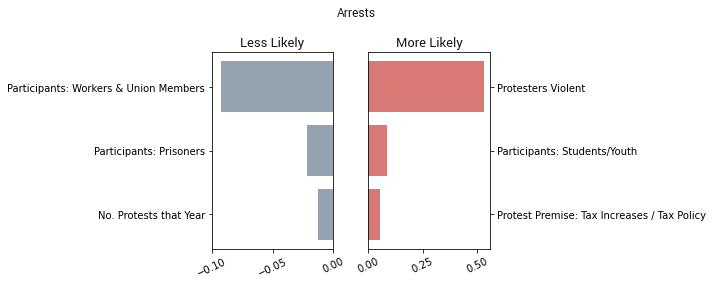

In [21]:
negative_features_arr, negative_coeffs_arr, positive_features_arr, positive_coeffs_arr = find_most_important_features(X_train_arr, logreg_arr, n=3)

plot_most_important_features(negative_features_arr, negative_coeffs_arr, positive_features_arr, positive_coeffs_arr, 'Arrests')

#### **_2. Accomodation_**

In [22]:
logreg_acc = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='liblinear')

X_train_acc, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'accomodation', logreg_acc)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


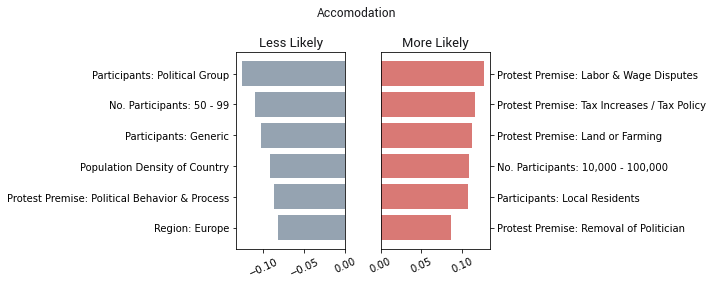

In [23]:
negative_features_acc, negative_coeffs_acc, positive_features_acc, positive_coeffs_acc = find_most_important_features(X_train_acc, logreg_acc, n=6)

plot_most_important_features(negative_features_acc, negative_coeffs_acc, positive_features_acc, positive_coeffs_acc, 'Accomodation')

#### **_3. Crowd Dispersal_**

In [24]:
logreg_cd = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_cd, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'crowddispersal', logreg_cd)

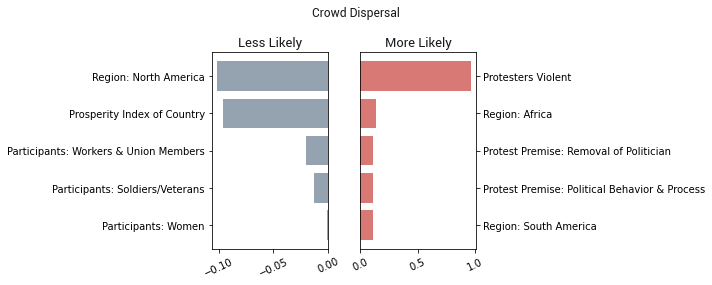

In [25]:
negative_features_cd, negative_coeffs_cd, positive_features_cd, positive_coeffs_cd = find_most_important_features(X_train_cd, logreg_cd, n=5)

plot_most_important_features(negative_features_cd, negative_coeffs_cd, positive_features_cd, positive_coeffs_cd, 'Crowd Dispersal')

In [26]:
# cd_coef = pd.DataFrame(list(zip(X_train_cd.columns, logreg_cd.coef_[0])), columns=['feature', 'coef'])
# cd_coef

#### **_4. Ignore_**

In [27]:
logreg_ig = LogisticRegression(C=0.01, max_iter=1000, penalty='l2', solver='saga')

X_train_ig, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'ignore', logreg_ig)

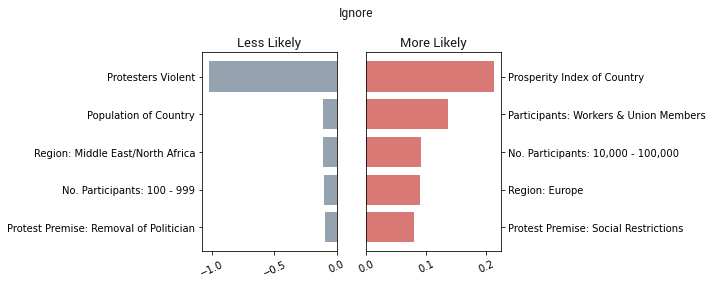

In [28]:
negative_features_ig, negative_coeffs_ig, positive_features_ig, positive_coeffs_ig = find_most_important_features(X_train_ig, logreg_ig, n=5)

plot_most_important_features(negative_features_ig, negative_coeffs_ig, positive_features_ig, positive_coeffs_ig, 'Ignore')

In [29]:
# ig_coef = pd.DataFrame(list(zip(X_train_ig.columns, logreg_ig.coef_[0])), columns=['feature', 'coef'])
# ig_coef

#### **_5. Violent Response_**

_Violent responses includes beatings, shootings, and killings as recorded in to the Mass Mobilization dataset._

In [30]:
logreg_vr = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='saga')

X_train_vr, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_tet = state_response_predictor(mass_no_country, features, 'violent_response', logreg_vr)

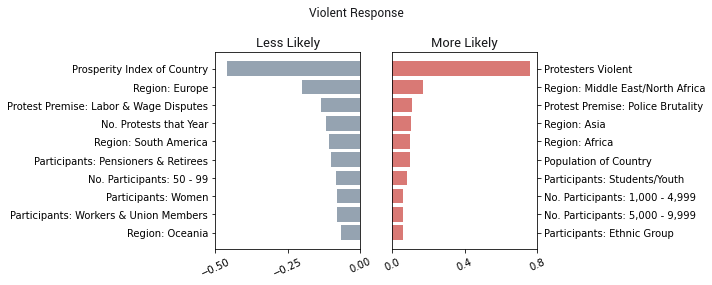

In [31]:
negative_features_vr, negative_coeffs_vr, positive_features_vr, positive_coeffs_vr = find_most_important_features(X_train_vr, logreg_vr, n=10)

plot_most_important_features(negative_features_vr, negative_coeffs_vr, positive_features_vr, positive_coeffs_vr, 'Violent Response')

In [32]:
# vr_coef = pd.DataFrame(list(zip(X_train_vr.columns, logreg_vr.coef_[0])), columns=['feature', 'coef'])
# vr_coef

#### **_6. Beatings_**

In [33]:
logreg_beat = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_beat, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'beatings', logreg_beat)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


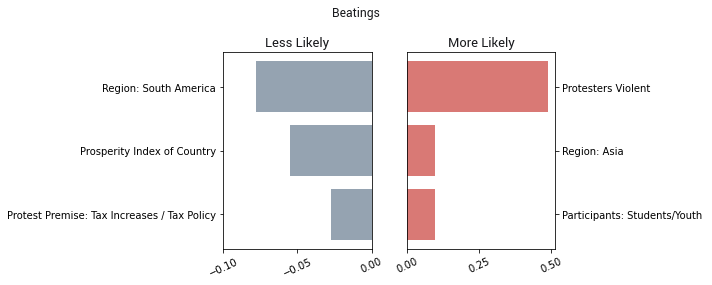

In [34]:
negative_features_beat, negative_coeffs_beat, positive_features_beat, positive_coeffs_beat = find_most_important_features(X_train_beat, logreg_beat, n=3)

plot_most_important_features(negative_features_beat, negative_coeffs_beat, positive_features_beat, positive_coeffs_beat, 'Beatings')

#### **_7. Shootings_**

In [35]:
logreg_shoot = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_shoot, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'shootings', logreg_shoot)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


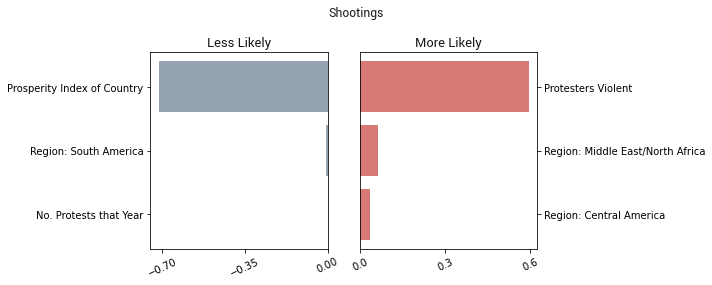

In [36]:
negative_features_shoot, negative_coeffs_shoot, positive_features_shoot, positive_coeffs_shoot = find_most_important_features(X_train_shoot, logreg_shoot, n=3)

plot_most_important_features(negative_features_shoot, negative_coeffs_shoot, positive_features_shoot, positive_coeffs_shoot, 'Shootings')

#### **_8. Killlings_**

In [37]:
logreg_kill = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_kill, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'killings', logreg_kill)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


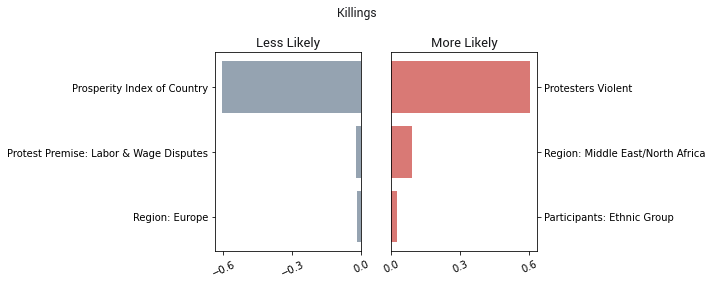

In [38]:
negative_features_kill, negative_coeffs_kill, positive_features_kill, positive_coeffs_kill = find_most_important_features(X_train_kill, logreg_kill, n=3)

plot_most_important_features(negative_features_kill, negative_coeffs_kill, positive_features_kill, positive_coeffs_kill, 'Killings')

In [39]:
# pd.DataFrame(list(zip(X_train_kill.columns, logreg_kill.coef_[0])))

### Building metrics dataframe, confusion matrix, and ROC curve for each curve

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,target,ROC/AUC,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.7324,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,accomodation,0.6492,0.0033,0.0000,0.5000,0.0000,0.0016,0.0000
2,crowddispersal,0.7962,0.6367,0.6267,0.6962,0.7013,0.5866,0.5664
3,ignore,0.7842,0.7855,0.7899,0.7020,0.7030,0.8915,0.9012
4,violent_response,0.8374,0.1783,0.2367,0.6202,0.6711,0.1041,0.1437


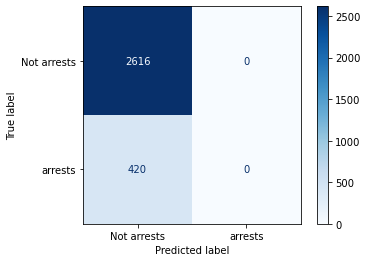

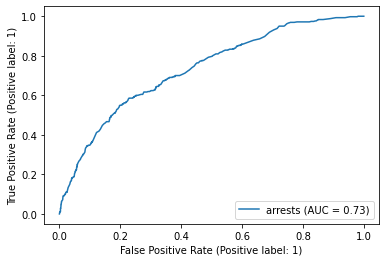

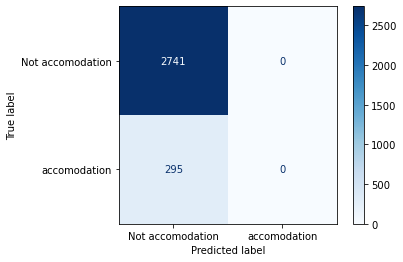

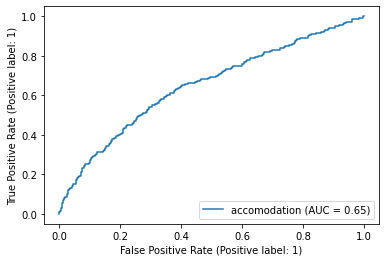

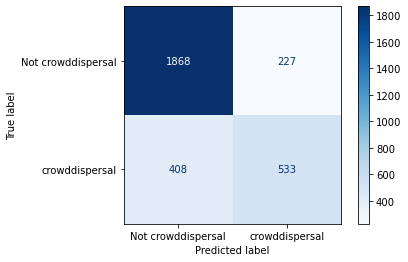

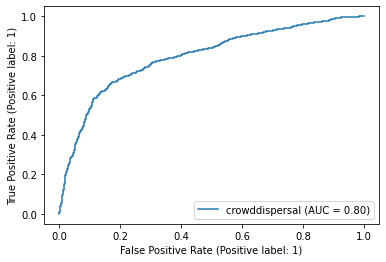

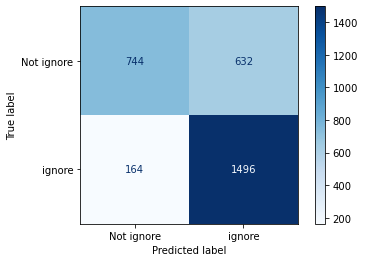

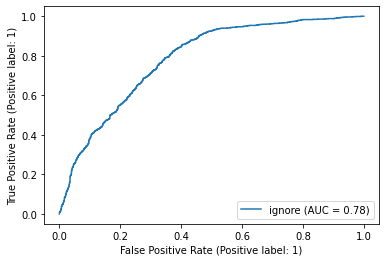

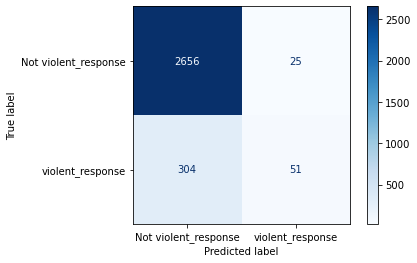

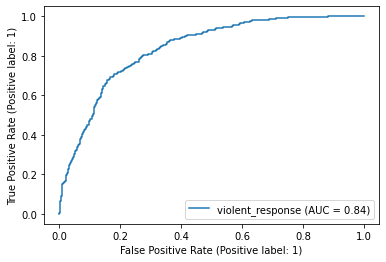

In [40]:
# instantiating dictionary to items as values 
model_performance_dict_nc = {
    'target':[],
    'ROC/AUC':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[],   
}

# list of responses to pass into 'state_response_predictor' just below 
targets = ['arrests','accomodation','crowddispersal','ignore', 'violent_response']  

# all models in list were fit in cells above by running function 
models = [logreg_arr, logreg_acc, logreg_cd, logreg_ig, logreg_vr]

# zipping targets and models together to pass to for-loop 
target_model_list = list(zip(targets, models))
    
# for-loop to run function that generates all the metrics and visuals 
#and then appends them to the dictionary    

for target, model in target_model_list:
        
    X_train, roc_auc, f1_score_train, f1_score_test, \
    precision_train, precision_test, recall_train, recall_test, \
    accuracy_train, accuracy_test = state_response_predictor(mass_no_country, 
                                                             features, 
                                                             target, 
                                                             model,
                                                             output_flag=True)

    model_performance_dict_nc['target'].append(target)
    model_performance_dict_nc['ROC/AUC'].append(roc_auc)
    model_performance_dict_nc['f1_score_train'].append(f1_score_train)
    model_performance_dict_nc['f1_score_test'].append(f1_score_test)
    model_performance_dict_nc['precision_train'].append(precision_train)
    model_performance_dict_nc['precision_test'].append(precision_test)
    model_performance_dict_nc['recall_train'].append(recall_train)
    model_performance_dict_nc['recall_test'].append(recall_test)
    
# creating dataframe from     
model_performance_df_nc = pd.DataFrame(model_performance_dict_nc)
model_performance_df_nc.round(4)

### Pickling models and adding to `models` folder on GitHub

In [40]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/Mass-Protests/users'

In [41]:
# arrests model 
model_file = '../models/03a_logistic_regression_arrests.pickle'
pickle.dump(logreg_arr, open(model_file, 'wb'))

In [42]:
# accomodation model 
model_file = '../models/03b_logistic_regression_accomodation.pickle'
pickle.dump(logreg_acc, open(model_file, 'wb'))

In [43]:
# crowd dispersal model 
model_file = '../models/03c_logistic_regression_crowddispersal.pickle'
pickle.dump(logreg_cd, open(model_file, 'wb'))

In [44]:
# ignore model 
model_file = '../models/03d_logistic_regression_ignore.pickle'
pickle.dump(logreg_ig, open(model_file, 'wb'))

In [45]:
# violent response model 
model_file = '../models/03e_logistic_regression_violent_response.pickle'
pickle.dump(logreg_vr, open(model_file, 'wb'))

In [46]:
# beatings model 
model_file = '../models/03f_logistic_regression_beatings.pickle'
pickle.dump(logreg_beat, open(model_file, 'wb'))

In [47]:
# shootings model 
model_file = '../models/03g_logistic_regression_shootings.pickle'
pickle.dump(logreg_shoot, open(model_file, 'wb'))

In [48]:
# killings model
model_file = '../models/03h_logistic_regression_killings.pickle'
pickle.dump(logreg_kill, open(model_file, 'wb'))